# Exploratory Data Science
Data exploration and understanding the task at hand is a fundamental step in the Machine Learning workflow. In this notebook, we'll take an opportunity to explore the use case, data and models we'll be using.

We have been tasked with developing an application which can identify if an insurance claim contains a car accident displayed in a static image. If an accident is detected, the claim is forwarded to the correct claims processing department.  

In this notebook we use a pre-trained machine learning model, YOLOv8m and explore how it works on static images. If it can detect a car then we can retrain the model to detect car accidents.  Note:  YOLO stands for <I> 'You Only Look Once'.</I>

To begin, we will install the ultralytics package for YOLO models and import some python packages:

In [1]:
! time pip install ultralytics
! pip install opencv-python-headless

import cv2
from ultralytics import YOLO
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 126.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 170.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 186.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 241.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 256.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 294.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 259.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 235.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 259.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 294.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 235.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.6/283.6 kB

In [2]:
#use YOLOv8m model for object detection
model = YOLO('yolov8m.pt')

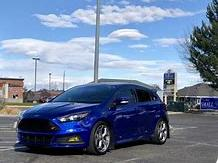

In [3]:
#display the image we wish to test
Image.open("images/carImage0.jpg")

In [4]:
#test that YOLO model can identify a car object in a given photo
results = model.predict("images/carImage0.jpg")


image 1/1 /opt/app-root/src/insurance-claim-processing/lab-materials/03/images/carImage0.jpg: 480x640 1 car, 884.3ms
Speed: 3.4ms preprocess, 884.3ms inference, 8.3ms postprocess per image at shape (1, 3, 480, 640)


We discover that YOLO has determined that there is '1 car' in the provided photo.  This is great news for us.  We can test out a few more photos to make certain YOLO is detecting car objects.  Then we can write some code to provide 'boxes' around the car YOLO detected for us.

In [5]:
! cd images ; curl -l https://static01.nyt.com/images/2021/04/30/multimedia/30xp-meme/29xp-meme-superJumbo-v3.jpg -o housefire.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  363k  100  363k    0     0  10.1M      0 --:--:-- --:--:-- --:--:-- 10.1M


In [7]:
!ls -al images

total 444
drwxrwsr-x. 2 1004200000 1004200000   4096 Dec  8 21:17 .
drwxrwsr-x. 4 1004200000 1004200000   4096 Dec  8 21:15 ..
-rw-rw-r--. 1 1004200000 1004200000   9484 Dec  8 21:01 carImage0.jpg
-rw-rw-r--. 1 1004200000 1004200000  17581 Dec  8 21:01 carImage1.jpg
-rw-rw-r--. 1 1004200000 1004200000  23268 Dec  8 21:01 carImage2.jpg
-rw-rw-r--. 1 1004200000 1004200000  14795 Dec  8 21:01 carImage3.jpg
-rw-r--r--. 1 1004200000 1004200000 372157 Dec  8 21:17 housefire.jpg


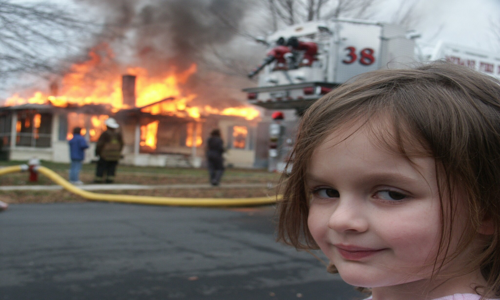

In [15]:
img = Image.open('images/housefire.jpg')
img_resized = img.resize((500, 300))
display(img_resized)

# Image.open("images/housefire.jpg")

In [16]:
results = model.predict("images/housefire.jpg")


image 1/1 /opt/app-root/src/insurance-claim-processing/lab-materials/03/images/housefire.jpg: 480x640 4 persons, 1 fire hydrant, 764.1ms
Speed: 2.4ms preprocess, 764.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
